In [1]:
#!ln -s /proyecto

In [2]:
import warnings
warnings.filterwarnings('ignore')

import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import logging
import sys

logging.basicConfig(
    format='%(asctime)s [%(levelname)s] %(name)s - %(message)s'
    , level=logging.INFO
    , datefmt = '%H:%M:%S'
    , stream = sys.stdout
)


from IPython.display import display,Markdown

from geoba import fillforms
import tosogoJupyter.rtkconf as pyconf
from gluecode import handlers as tosogo
from gluecode import printers as report
from gluecode.mdtemplates import *

# Memoria de Relevamiento

Se midieron con equipos GPS de simple frecuencia dos puntos que se denominaron
PFD1 y PFD2, y se vincularon a la estación permanente IGM1. En este apartado
se describe el procesamiento GPS, incluyendo la salida del programa de procesamiento. 

In [3]:
FILEFLD = 'proyecto'
BASE = 'igm10240.20o'
PIE = 'PFD10240.20o'
AZIMUT = 'PFD20240.20o'

In [4]:
display(Markdown(mdfiles.format(BASE=BASE,PIE=PIE,AZIMUT=AZIMUT)))


## Archivos de medición

Los archivos de medición se incluyen en formato Rinex 2.11, como

- Base permanente RAMSAC: `igm10240.20o`
- Punto base del vector: `PFD10240.20o`
- Punto de azimut del vector: `PFD20240.20o`

## Datos de Sesion.

Los datos de la sesión, extraidos de los archivos de medición,
se proveen en los anexos 4.1 que se adjuntan.

Se incluye también el anexo 4 con datos generales del trabajo.


## Archivos de Sesiones

Cada vector se separó en dos sesiones de medición, utilizando la herramienta RinEdit, de GPSTk

In [5]:
datos = {}

for i,k in zip([BASE, PIE, AZIMUT],['base','pie','azimut']):
    archivo = os.path.join(FILEFLD,i)
    f = tosogo.DataFile(archivo)
    datos[k] = f

REFNAV = datos['base'].path[:-1]+'n'

for k in ['pie','azimut','base']:
    datos[k].store_pdops(nav=REFNAV)

valid_eps_total = {'{}'.format(k):datos[k].pdop.size for k in ['pie','azimut']}

# TRIM PDOP > 2.5
for k in ['pie','azimut','base']:
    #datos[k].store_pdops(nav=REFNAV)
    datos[k] = datos[k]._pdop_filter()
    datos[k].store_pdops(nav=REFNAV)
    
valid_eps_filt = {'{}'.format(k):datos[k].pdop.size for k in ['pie','azimut']}

20:15:49 [INFO] Gpstk - Ejecutando RinSum para extraer información de proyecto/igm10240.20o
20:15:53 [INFO] Gpstk - Ejecutando RinSum para extraer información de proyecto/PFD10240.20o
20:15:54 [INFO] Gpstk - Ejecutando RinSum para extraer información de proyecto/PFD20240.20o
20:15:54 [INFO] Gpstk - Ejecutando PRSolve: calculando solución L1 autonoma de proyecto/PFD10240.20o
20:16:35 [INFO] Gpstk - Cargando Pdop: desde la solucion autonoma de /tmp/tmp_4t5sbqh/PFD10240.sol
20:16:36 [INFO] Gpstk - Ejecutando PRSolve: calculando solución L1 autonoma de proyecto/PFD20240.20o
20:17:10 [INFO] Gpstk - Cargando Pdop: desde la solucion autonoma de /tmp/tmpxbereelh/PFD20240.sol
20:17:11 [INFO] Gpstk - Ejecutando PRSolve: calculando solución L1 autonoma de proyecto/igm10240.20o
20:18:17 [INFO] Gpstk - Cargando Pdop: desde la solucion autonoma de /tmp/tmpjsphtg3z/igm10240.sol
20:18:18 [INFO] Gpstk - Filtrando proyecto/PFD10240.20o: eliminando epocas con pdop > 2.5
20:18:20 [INFO] Gpstk - Usando Rin

In [6]:
display(Markdown(mdpdop.format(base=PIE[:4],az=AZIMUT[:4],
                               nbase=valid_eps_total['pie']-valid_eps_filt['pie'],
                               naz=valid_eps_total['azimut']-valid_eps_filt['azimut'],
                               nbasehs=valid_eps_filt['pie']/3600.,
                               nazhs=valid_eps_filt['azimut']/3600.)))


## Filtrado por PDOP

Con la herramienta PRSolve, parte de GPSTk, se calculó el PDOP para cada época de los archivos de medición.

Luego, con la herramienta RinEdit se eliminaron las epocas con PDOP > 2.5, resultando en:

- PFD1: 936 epocas eliminadas, 4.96 horas efectivas de medición
- PFD2: 1023 epocas eliminadas, 4.45 horas efectivas de medición


In [7]:
SPLITPATH = os.path.join(FILEFLD,'splits')

!mkdir -p {SPLITPATH}

for k,v in datos.items():
    if k == 'base':
        continue
    else:
        v.mid_split(folder=SPLITPATH)
        #v.store_pdops(nav=REFNAV)

20:21:09 [INFO] Gpstk - Ejecutando RinEdit: Cortando proyecto/filt_PFD10240.20o hasta 2020-01-24T21:11:45.000000
20:21:10 [INFO] Gpstk - Usando RinSum para chequear la validez de proyecto/splits/filt_PFD10241.20o
20:21:11 [INFO] Gpstk - RinEdit: generado proyecto/splits/filt_PFD10241.20o
20:21:11 [INFO] Gpstk - Ejecutando RinEdit: Cortando proyecto/filt_PFD10240.20o desde 2020-01-24T21:11:45.000000
20:21:13 [INFO] Gpstk - Usando RinSum para chequear la validez de proyecto/splits/filt_PFD10242.20o
20:21:13 [INFO] Gpstk - RinEdit: generado proyecto/splits/filt_PFD10242.20o
20:21:13 [INFO] Gpstk - Ejecutando RinEdit: Cortando proyecto/filt_PFD20240.20o hasta 2020-01-24T21:59:39.000000
20:21:14 [INFO] Gpstk - Usando RinSum para chequear la validez de proyecto/splits/filt_PFD20241.20o
20:21:14 [INFO] Gpstk - RinEdit: generado proyecto/splits/filt_PFD20241.20o
20:21:15 [INFO] Gpstk - Ejecutando RinEdit: Cortando proyecto/filt_PFD20240.20o desde 2020-01-24T21:59:39.000000
20:21:16 [INFO] Gpst

In [8]:
display(Markdown(mdsessions.format(nbase=BASE[:4].upper(),npie=PIE[:4].upper(),naz=AZIMUT[:4].upper(),
                                  fpie=os.path.basename(datos['base'].path),
                                  fbase=os.path.basename(datos['pie'].path),
                                  faz=os.path.basename(datos['azimut'].path),
                                  fpie1=os.path.basename(datos['pie'].path).replace('0.','1.'),
                                  faz1=os.path.basename(datos['azimut'].path).replace('0.','1.'),
                                  fpie2=os.path.basename(datos['pie'].path).replace('0.','2.'),
                                  faz2=os.path.basename(datos['azimut'].path).replace('0.','2.'),
                                  )))


## Archivos de Sesiones

Se generaron los archivos de sesión para el cálculo individual, utilizando RinEdit para realizar el corte de los mismos.

- Vector IGM1->PFD1:
  - Sesion 1: filt_PFD10240.20o; filt_PFD10241.20o
  - Sesion 2: filt_PFD10240.20o; filt_PFD10242.20o
  - Sesion completa: filt_PFD10240.20o; filt_igm10240.20o

- Vector PFD1->PFD2:
  - Sesion 1: filt_igm10240.20o; filt_PFD20241.20o
  - Sesion 2: filt_igm10240.20o; filt_PFD20242.20o
  - Sesion completa: filt_PFD10240.20o; filt_PFD20241.20o


In [9]:
for k,v in datos.items():
    v.store_pdops(nav=REFNAV)

20:21:16 [INFO] Gpstk - Ejecutando PRSolve: calculando solución L1 autonoma de proyecto/filt_igm10240.20o
20:22:25 [INFO] Gpstk - Cargando Pdop: desde la solucion autonoma de /tmp/tmplxr7js4q/filt_igm10240.sol
20:22:26 [INFO] Gpstk - Ejecutando PRSolve: calculando solución L1 autonoma de proyecto/filt_PFD10240.20o
20:23:05 [INFO] Gpstk - Cargando Pdop: desde la solucion autonoma de /tmp/tmp_6mj6aky/filt_PFD10240.sol
20:23:05 [INFO] Gpstk - Ejecutando PRSolve: calculando solución L1 autonoma de proyecto/splits/filt_PFD10241.20o
20:23:23 [INFO] Gpstk - Cargando Pdop: desde la solucion autonoma de /tmp/tmp965sbwom/filt_PFD10241.sol
20:23:24 [INFO] Gpstk - Ejecutando PRSolve: calculando solución L1 autonoma de proyecto/splits/filt_PFD10242.20o
20:23:42 [INFO] Gpstk - Cargando Pdop: desde la solucion autonoma de /tmp/tmp7yj4flzr/filt_PFD10242.sol
20:23:42 [INFO] Gpstk - Ejecutando PRSolve: calculando solución L1 autonoma de proyecto/filt_PFD20240.20o
20:24:11 [INFO] Gpstk - Cargando Pdop: d

In [10]:
display(Markdown(mdpdopgraphs))


## PDOP de cada sesión

Para cada sesión se buscó el PDOP máximo, y a continuación se presentan las gráficas
de PDOP en función del tiempo para cada una.


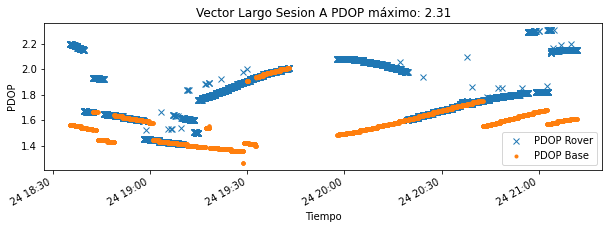

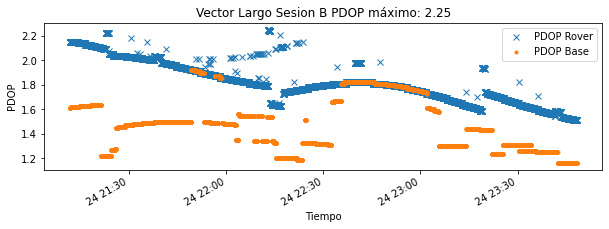

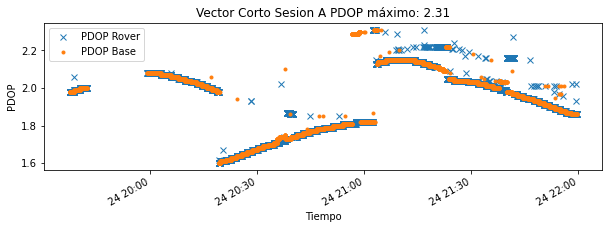

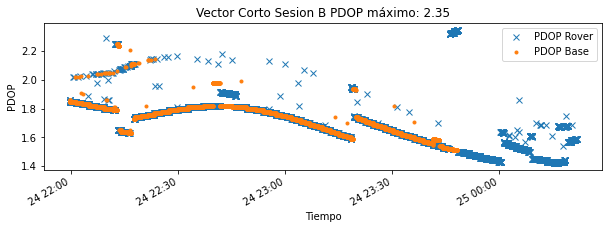

In [11]:
for doprover,dopbase,titulo in zip(
    [datos['pie'].p1pdop,datos['pie'].p2pdop,datos['azimut'].p1pdop,datos['azimut'].p2pdop],
    [datos['base'].pdop,datos['base'].pdop,datos['pie'].pdop,datos['pie'].pdop],
    ['Vector Largo Sesion A','Vector Largo Sesion B',
     'Vector Corto Sesion A','Vector Corto Sesion B']):
    
    fig,ax = plt.subplots(figsize=(10,3))
    doprover.plot(style='x',ax=ax,label='PDOP Rover')
    dopbasere = dopbase.reindex(doprover.index)
    dopbasere.plot(style='.',ax=ax,label='PDOP Base')
    ax.set_title(titulo + ' PDOP máximo: {}'.format(max([doprover.max(),dopbasere.max()])))
    ax.legend()
    ax.set_xlabel("Tiempo")
    ax.set_ylabel("PDOP")
    plt.show()

# Con esta información se generaron los Anexos 4 y 4.1

In [12]:
filesinfo = fillforms.get_rx_data(datos['base'].path,
                                  datos['pie'].p1path,
                                  datos['pie'].p2path )
fillforms.make_template(filesinfo,template_file='./forms/Anexo4.1.fdf',
                        out=f'./output/Anexo4.1-{BASE[:4]}-{PIE[:4]}.fdf')

In [13]:
kwargs = {
    'pdf_file':'./forms/Anexo4.1.pdf',
    'fdf_file':f'./output/Anexo4.1-{BASE[:4]}-{PIE[:4]}.fdf',
    'out':f'./output/Anexo4.1-{BASE[:4]}-{PIE[:4]}.pdf'
}

fillforms.apply_template(**kwargs)

In [14]:
filesinfo = fillforms.get_rx_data(datos['pie'].path,
                                  datos['azimut'].p1path,
                                  datos['azimut'].p2path )
fillforms.make_template(filesinfo,template_file='./forms/Anexo4.1.fdf',
                        out=f'./output/Anexo4.1-{PIE[:4]}-{AZIMUT[:4]}.fdf')

In [15]:
kwargs = {
    'pdf_file':'./forms/Anexo4.1.pdf',
    'fdf_file':f'./output/Anexo4.1-{PIE[:4]}-{AZIMUT[:4]}.fdf',
    'out':f'./output/Anexo4.1-{PIE[:4]}-{AZIMUT[:4]}.pdf'
}

fillforms.apply_template(**kwargs)

# Antenas:

Las antenas utilizadas, modelo NAP100 de Ashtech, que son las antenas originales del equipo Promark 3, no se encuentran en el archivo de información de antena del software de procesamiento RTKLIB, los parámetros utilizados, extraidos de la información que viene grabada en la antena, están a continuación y son agregados al archivo de antenas para poder realizar el cálculo.

El formato del archivo es el siguiente:
https://kb.igs.org/hc/en-us/articles/216104678-ANTEX-format-description

Los datos agregados son:
```      
                                                            START OF ANTENNA    
NAP100          NONE                                        TYPE / SERIAL NO    
FIELD               JJC                      0    02-DIC-20 METH / BY / # / DATE
     0.0                                                    DAZI                
     0.0  80.0   5.0                                        ZEN1 / ZEN2 / DZEN  
     1                                                      # OF FREQUENCIES    
CONVERTED FROM RELATIVE NGS ANTENNA CALIBRATIONS            COMMENT             
   G01                                                      START OF FREQUENCY  
      0.00      0.00     73.00                              NORTH / EAST / UP   
   G01                                                      END OF FREQUENCY    
                                                            END OF ANTENNA      
```      
                                                            



In [16]:
antenaNAP100 = \
"""
                                                            START OF ANTENNA    
NAP100          NONE                                        TYPE / SERIAL NO    
FIELD               JJC                      0    02-DIC-20 METH / BY / # / DATE
     0.0                                                    DAZI                
     0.0  80.0   5.0                                        ZEN1 / ZEN2 / DZEN  
     1                                                      # OF FREQUENCIES    
CONVERTED FROM RELATIVE NGS ANTENNA CALIBRATIONS            COMMENT             
   G01                                                      START OF FREQUENCY  
      0.00      0.00     73.00                              NORTH / EAST / UP   
   G01                                                      END OF FREQUENCY    
                                                            END OF ANTENNA
EOF
"""
!cat /rtklib/data/igs05.atx - <<EOF > /rtklib/data/antenas.atx $antenaNAP100

In [17]:
from importlib import reload
pyconf= reload(pyconf)

In [18]:
config_form1 = pyconf.formulario()

In [19]:
pyconf.load_conf('/rtklib/confs/L1-long-bl.cfg',config_form1)

In [20]:
config_form1

GridspecLayout(children=(Dropdown(description='pos1-posmode', index=3, layout=Layout(grid_area='widget001'), o…

In [21]:
pyconf.save_conf('/proyecto/conf.cfg',config_form1)

In [22]:
with open('/proyecto/conf.cfg','r') as f:
    lines = f.readlines()

params = {i.strip():j.strip() for i,j in [k.split('=') for k in lines] }

display(Markdown(mdconfigs.format(**params)))


## Opciones de Procesamiento (RTKLIB)

### General

| Opción | valor |
|--------|:-----:|
|Modo de Procesamiento | static |
|Frecuencias | l1 |
|Modo del filtro Kallman | forward |
|Mascara de Elevación | 10 |
|Mascara de SNR |  |
|Aceleración/velocidad en el filtro Kallman | on |
|Corrección por marea terrestre | on |
|Modo de Corrección de ionosfera | off |
|Modo de Corrección de troposfera | saas |
|Tipo de efemérides | brdc |
|Excluir satelites |  |
|Sistemas utilizados | gps |
|Modo resolución de ambiguedad | fix-and-hold |
|Resolver Ambiguedad Glonass (si corresponde) | on |
|Umbral resolución de ambiguedad | 3 |
|Minimo segmento para fijar ambiguedad | 60 |
|Mascara de elevación para resolver ambiguedad | 15 |
|Ciclos faltantes para resetear ambiguedad | 1 |
|Minimo segmento para mantener ambiguedad | 120 |
|Mascara de elevación para mantener ambiguedad | 20 |
|Umbral para salto de ciclo | 0.05 |
|Tipo de altura | ellipsoidal |

### Parámetros del filtro Kallman

| Opción | valor |
|--------|:-----:|
| Varianza relativa Codigo/fase | 100 |
| Varianza fase [m] | 0.003 |
| Varianza de fase segun elevación [m/seno(el)] | 0.003 |
| Desvio a-priori Ambiguedades | 30 |
| Desvio a-priori Ambiguedades retardo iono | 0.03 |
| Desvio a-priori Ambiguedades retardo tropo | 0.6 |
| Ruido de proceso aceleración H | 0.01 |
| Ruido de proceso aceleración V | 0.001 |
| Ruido de proceso ambiguedades | 0.0001 |
| Ruido de proceso retardo ionosferico | 0.001 |
| Ruido de proceso retardo troposferico | 0.0001 |
| Estabilidad de reloj | 5e-12 |


In [23]:
import gluecode.downloaders as dld

In [24]:
sp3files = dld.getPreciseEphs(datos['base'],'/proyecto/sp3')

# Procesamiento con rnx2rtkp

El procesamiento fue realizado con el programa por linea de comandos de RTKlib, ```rnx2rtkp```  en dos corridas, directa ('*forward*') e invertida ('*backward*') del filtro de kallman para cada sesión.

A continuación el encabezado de la salida del programa, el resto de la salida, correspondiente a los resultados, se presenta mas adelante en forma de tablas y gráficas.

In [25]:
_= datos['pie'].process(datos['base'],'proyecto/conf.cfg',sp3=sp3files,nav=REFNAV)

20:25:04 [INFO] Rtklib - Resolviendo vector con RTKLIB: 
20:25:04 [INFO] Rtklib - Archivo Base: proyecto/filt_igm10240.20o
20:25:04 [INFO] Rtklib - Archivo Rotador: proyecto/filt_PFD10240.20o
20:25:04 [INFO] Rtklib - Archivo de Configuración: proyecto/conf.cfg
                                        
Sesión: proyecto/sesiones/igm1-PFD1-0-fw
% program   : RTKLIB ver.2.4.3
% inp file  : proyecto/filt_PFD10240.20o
% inp file  : proyecto/filt_igm10240.20o
% inp file  : proyecto/igm10240.20n
% inp file  : /proyecto/sp3/igs20896.sp3
% inp file  : /proyecto/sp3/igs20894.sp3
% inp file  : /proyecto/sp3/igs20895.sp3
% obs start : 2020/01/24 18:35:15.0 GPST (week2089 498915.0s)
% obs end   : 2020/01/24 23:48:15.0 GPST (week2089 517695.0s)
% pos mode  : Static
% freqs     : L1
% solution  : Forward
% elev mask : 10.0 deg
% dynamics  : on
% tidecorr  : on
% ionos opt : OFF
% tropo opt : Saastamoinen
% ephemeris : Broadcast
% navi sys  : GPS GLONASS
% amb res   : Fix and Hold
% amb glo   : ON
% val

In [26]:
_= datos['pie'].reloadProcesed()

In [27]:
proceso = datos['pie']
display(Markdown(mdpos.format(npto=PIE[:4],
                              ptlat=report.GEOBA_final_pos(proceso,proj=None).iloc[0]['latitud'],
                              ptlon=report.GEOBA_final_pos(proceso,proj=None).iloc[0]['longitud'],
                              tablaGK=report.GEOBA_final_pos(proceso).to_markdown(floatfmt=".3f"),
                              tablaLL=report.GEOBA_final_pos(proceso,proj='geograficas').to_markdown(floatfmt=".3f"))))


## Resultados de procesamiento

La posición calculada para punto de llegada del vector, punto PFD1, fue:

|                 | latitud          | longitud         |   altura |
|:----------------|:-----------------|:-----------------|---------:|
| Sesion Completa | -34°57'14.94247" | -58°47'31.88255" |   36.222 |
| Sesion 1        | -34°57'14.94278" | -58°47'31.88279" |   36.219 |
| Sesion 2        | -34°57'14.94158" | -58°47'31.88130" |   36.259 |

En coordenadas proyectadas, Gauss Krugger faja 5:

|                 |        Este |       Norte |   Altura |
|:----------------|------------:|------------:|---------:|
| Sesion Completa | 5610323.099 | 6131793.095 |   36.222 |
| Sesion 1        | 5610323.093 | 6131793.086 |   36.219 |
| Sesion 2        | 5610323.131 | 6131793.122 |   36.259 |

A continuación se grafica un resumen de los resultados de procesamiento.

La posición horizontal se grafica, centrada en la posición final de la sesión
completa, con dos curvas. Una curva llena que indica
un desvío de 2$\sigma$ --es decir que el 66% de las épocas resueltas fijas
quedan dentro de ese perimetro-- y una punteada que indica un intervalo del
95%.

La altura se grafica con un histogramas correspondientes a cada sesión, donde
también se grafica con un gráfico de caja y bigote la media y los cuartiles
(que encierran el %50 de las soluciones).

La posición final se puede
[Ver en Google Maps](https://maps.google.com/maps?t=k&q=loc:-34.954150686+-58.792189597)
para mayor comodidad


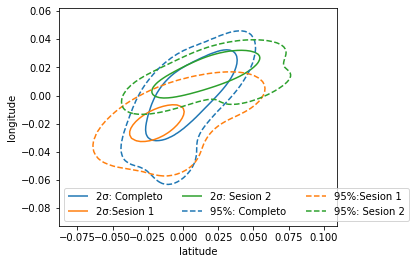

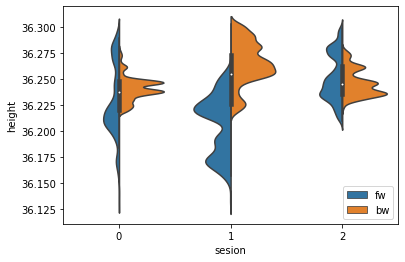

In [28]:
report.plotSessionGraphs(datos['pie'].sessData,filtro=lambda x:report.filtroGauss(report.filtroQ(x)))

In [29]:
sitio = tosogo.parse_marker(datos['pie']._sumary)

with open('/rtklib/data/ramsac.pos','a+') as f:
    print('{latitud:13.9f} {longitud:14.9f} {altura:9.3f}  {punto}  {punto}'\
          .format(**report.GEOBA_final_pos(datos['pie'],proj=None).iloc[0],punto=sitio),file=f)

# Vector de Orientación

In [30]:
config_form2 = pyconf.formulario()

In [31]:
pyconf.load_conf('/rtklib/confs/L1-short-bl.cfg',config_form2)

In [32]:
config_form2

GridspecLayout(children=(Dropdown(description='pos1-posmode', index=3, layout=Layout(grid_area='widget001'), o…

In [33]:
pyconf.save_conf('/proyecto/conf2.cfg',config_form2)

In [34]:
with open('/proyecto/conf2.cfg','r') as f:
    lines = f.readlines()

params = {i.strip():j.strip() for i,j in [k.split('=') for k in lines] }

display(Markdown(mdconfigs.format(**params)))


## Opciones de Procesamiento (RTKLIB)

### General

| Opción | valor |
|--------|:-----:|
|Modo de Procesamiento | static |
|Frecuencias | l1 |
|Modo del filtro Kallman | forward |
|Mascara de Elevación | 10 |
|Mascara de SNR |  |
|Aceleración/velocidad en el filtro Kallman | on |
|Corrección por marea terrestre | on |
|Modo de Corrección de ionosfera | off |
|Modo de Corrección de troposfera | saas |
|Tipo de efemérides | brdc |
|Excluir satelites |  |
|Sistemas utilizados | gps |
|Modo resolución de ambiguedad | fix-and-hold |
|Resolver Ambiguedad Glonass (si corresponde) | on |
|Umbral resolución de ambiguedad | 5 |
|Minimo segmento para fijar ambiguedad | 1 |
|Mascara de elevación para resolver ambiguedad | 10 |
|Ciclos faltantes para resetear ambiguedad | 1 |
|Minimo segmento para mantener ambiguedad | 10 |
|Mascara de elevación para mantener ambiguedad | 10 |
|Umbral para salto de ciclo | 0.05 |
|Tipo de altura | ellipsoidal |

### Parámetros del filtro Kallman

| Opción | valor |
|--------|:-----:|
| Varianza relativa Codigo/fase | 100 |
| Varianza fase [m] | 0.003 |
| Varianza de fase segun elevación [m/seno(el)] | 0.003 |
| Desvio a-priori Ambiguedades | 30 |
| Desvio a-priori Ambiguedades retardo iono | 0.03 |
| Desvio a-priori Ambiguedades retardo tropo | 0.3 |
| Ruido de proceso aceleración H | 0.1 |
| Ruido de proceso aceleración V | 0.01 |
| Ruido de proceso ambiguedades | 0.0001 |
| Ruido de proceso retardo ionosferico | 0.001 |
| Ruido de proceso retardo troposferico | 0.0001 |
| Estabilidad de reloj | 5e-12 |


# Procesamiento con rnx2rtkp

El procesamiento fue realizado con el programa por linea de comandos de RTKlib, ```rnx2rtkp```  en dos corridas, directa ('*forward*') e invertida ('*backward*') del filtro de kallman para cada sesión.

A continuación el encabezado de la salida del programa, el resto de la salida, correspondiente a los resultados, se presenta mas adelante en forma de tablas y gráficas.

In [35]:
_= datos['azimut'].process(datos['pie'],'proyecto/conf2.cfg',sp3=sp3files,nav=REFNAV)

20:28:33 [INFO] Rtklib - Resolviendo vector con RTKLIB: 
20:28:33 [INFO] Rtklib - Archivo Base: proyecto/filt_PFD10240.20o
20:28:33 [INFO] Rtklib - Archivo Rotador: proyecto/filt_PFD20240.20o
20:28:33 [INFO] Rtklib - Archivo de Configuración: proyecto/conf2.cfg
                                        
Sesión: proyecto/sesiones/PFD1-PFD2-0-fw
% program   : RTKLIB ver.2.4.3
% inp file  : proyecto/filt_PFD20240.20o
% inp file  : proyecto/filt_PFD10240.20o
% inp file  : proyecto/igm10240.20n
% inp file  : /proyecto/sp3/igs20896.sp3
% inp file  : /proyecto/sp3/igs20894.sp3
% inp file  : /proyecto/sp3/igs20895.sp3
% obs start : 2020/01/24 19:37:31.0 GPST (week2089 502651.0s)
% obs end   : 2020/01/25 00:21:47.0 GPST (week2089 519707.0s)
% pos mode  : Static
% freqs     : L1
% solution  : Forward
% elev mask : 10.0 deg
% dynamics  : on
% tidecorr  : on
% ionos opt : OFF
% tropo opt : Saastamoinen
% ephemeris : Broadcast
% navi sys  : GPS GLONASS
% amb res   : Fix and Hold
% amb glo   : ON
% va

In [36]:
_= datos['azimut'].reloadProcesed()

In [37]:
proceso = datos['azimut']
display(Markdown(mdpos.format(npto=PIE[:4],
                              ptlat=report.GEOBA_final_pos(proceso,proj=None).iloc[0]['latitud'],
                              ptlon=report.GEOBA_final_pos(proceso,proj=None).iloc[0]['longitud'],
                              tablaGK=report.GEOBA_final_pos(proceso).to_markdown(floatfmt=".3f"),
                              tablaLL=report.GEOBA_final_pos(proceso,proj='geograficas').to_markdown(floatfmt=".3f"))))


## Resultados de procesamiento

La posición calculada para punto de llegada del vector, punto PFD1, fue:

|                 | latitud          | longitud         |   altura |
|:----------------|:-----------------|:-----------------|---------:|
| Sesion Completa | -34°56'45.40044" | -58°46'58.71314" |   40.217 |
| Sesion 1        | -34°56'45.40046" | -58°46'58.71317" |   40.216 |
| Sesion 2        | -34°56'45.40029" | -58°46'58.71307" |   40.215 |

En coordenadas proyectadas, Gauss Krugger faja 5:

|                 |        Este |       Norte |   Altura |
|:----------------|------------:|------------:|---------:|
| Sesion Completa | 5611175.818 | 6132693.346 |   40.217 |
| Sesion 1        | 5611175.817 | 6132693.345 |   40.216 |
| Sesion 2        | 5611175.820 | 6132693.350 |   40.215 |

A continuación se grafica un resumen de los resultados de procesamiento.

La posición horizontal se grafica, centrada en la posición final de la sesión
completa, con dos curvas. Una curva llena que indica
un desvío de 2$\sigma$ --es decir que el 66% de las épocas resueltas fijas
quedan dentro de ese perimetro-- y una punteada que indica un intervalo del
95%.

La altura se grafica con un histogramas correspondientes a cada sesión, donde
también se grafica con un gráfico de caja y bigote la media y los cuartiles
(que encierran el %50 de las soluciones).

La posición final se puede
[Ver en Google Maps](https://maps.google.com/maps?t=k&q=loc:-34.945944568+-58.782975871)
para mayor comodidad


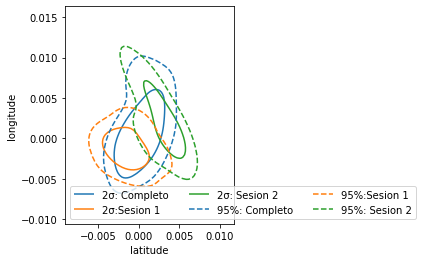

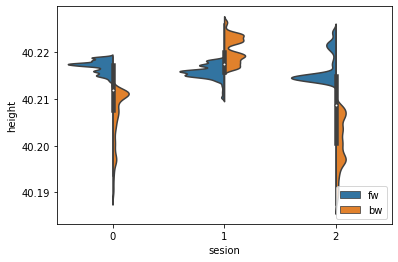

In [38]:
report.plotSessionGraphs(datos['azimut'].sessData,filtro=lambda x:report.filtroGauss(report.filtroQ(x)))

In [70]:
pd.DataFrame({tosogo.parse_marker(datos[i]._sumary):report.finalPOS(datos[i])\
              for i in ('base','pie','azimut')}).to_csv('Resultados.csv')